In [1]:
import math
import numpy as np
import os
import pandas as pd

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA

In [2]:
def get_lines_from_file(filename):
    f=open(filename)
    lines=[x.strip() for x in f]
    f.close()
    return lines

In [3]:
rgbWords  = ['yellow','blue','purple', 'orange','red','green']
shapeWords  = ['cylinder','cube', 'triangle','triangular','rectangular']
objWords = ['cylinder', 'apple','carrot', 'lime','lemon','orange', 'banana','cube', 'triangle', 'corn','cucumber', 'half', 'cabbage', 'ear', 'tomato', 'potato', 'cob','eggplant']

In [4]:
def get_deviations(filename,words):
    lines=get_lines_from_file("/Users/adithyabandi/_True_True_90_25_rgb_0_min_max.txt")
    tokens=[]
    mins=[]
    maxs=[]
    reqmins=[]
    reqmaxs=[]
    for line in lines:
        temp=line.split("_")
        tokens.append(temp[1])
        mins.append(temp[3])
        maxs.append(temp[5])
    for i in range(len(tokens)):
        if tokens[i] in words:
            reqmins.append(mins[i])
            reqmaxs.append(maxs[i])
    return reqmins,reqmaxs    

In [5]:
def get_report(filename):
    lines=get_lines_from_file(filename)
    j=0
    types=[]
    estops=[]
    sorts=[]
    pre_thres=[]
    rec_thres=[]
    split=[]
    acc=[]
    pre=[]
    rec=[]
    f1=[]
    min_means=[]
    min_medians=[]
    min_std_devs=[]
    max_means=[]
    max_medians=[]
    max_std_devs=[]
    i=0
    while i<len(lines):
        mins_agg=[]
        maxs_agg=[]
        for counter in range(4):
            if(lines[i]=="done"):
                i+=1
                break
            mins_str=lines[i].split("]")[0].split("[")[1].split(",")
            mins=[float(per_min) for per_min in mins_str]
            for mini in mins:
                mins_agg.append(mini)
            i+=1
            maxs_str=lines[i].split("]")[0].split("[")[1].split(",")
            maxs=[float(per_max) for per_max in maxs_str]
            for maxi in maxs:
                maxs_agg.append(maxi)
            i+=1
            g=lines[i]
            #print(lines[i])
            temp=g.split("-")
            sorts.append(temp[0])
            types.append(temp[1])
            estops.append(temp[2])
            pre_thres.append(temp[3])
            rec_thres.append(temp[4])
            split.append(temp[5])
            i+=2
            acc.append(float(lines[i])*100)
            i+=1
            f1.append(float(lines[i])*100)
            i+=1
            pre.append(float(lines[i])*100)
            i+=1
            rec.append(float(lines[i])*100)
            i+=2
            j+=1
        for counter in range(4):
            min_means.append(np.mean(mins_agg))
            min_medians.append(np.median(mins_agg))
            min_std_devs.append(np.std(mins_agg))
            max_means.append(np.mean(maxs_agg))
            max_medians.append(np.median(maxs_agg))
            max_std_devs.append(np.std(maxs_agg))
        
    Results=pd.DataFrame({'type':types,'early_stop':estops,
                      'pre_threshold':pre_thres,
                       'rec_threshold':rec_thres,'instances_sorted':sorts,
                          'precision':pre,'recall':rec,
                        'f1_score':f1,
                       'split':split,'accuracy':acc,#})
                       "mean_min_dissim_":min_means,"median_min_dissim_":min_medians,
                        "std_dev_min_dissim_":min_std_devs,
                        "mean_max_dissim_":max_means,
                        "median_max_dissim_":max_medians,
                        "std_dev_max_dissim_":max_std_devs})
    return Results

In [6]:
Results=get_report("/Users/adithyabandi/TM6_AllExecutionI.csv")
#Results

In [7]:
Results=Results[['instances_sorted','early_stop','type','split','pre_threshold', 'rec_threshold', 
                'f1_score','precision','recall','accuracy','mean_max_dissim_', 'mean_min_dissim_', 
                'median_max_dissim_','median_min_dissim_','std_dev_max_dissim_', 'std_dev_min_dissim_']]

In [8]:
#Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().sort_values(by=["f1_score"],ascending=False)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
def display_results(Results,feature_type,early_stop,instance_sort):
    object_Results=Results[Results.type==feature_type]
    object_Results=object_Results[object_Results.early_stop==early_stop]
    object_Results=object_Results[object_Results.instances_sorted==instance_sort]
    object_Results_grouped=object_Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold'])
    display(pd.DataFrame(object_Results_grouped.mean().reset_index()).sort_values(by=["f1_score"],ascending=False))
    object_Results_grouped_df=object_Results_grouped.aggregate(np.mean)
    object_Results_grouped_df=object_Results_grouped_df.reset_index()
    data_pivoted = object_Results_grouped_df[(object_Results_grouped_df.early_stop==early_stop) & (object_Results_grouped_df.instances_sorted==instance_sort)].pivot("pre_threshold", "rec_threshold", "f1_score")
    ax = sns.heatmap(data_pivoted)
    plt.show()

With instances sorted as True
With Early Stop set as True
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
4,True,True,rgb,50,25,94.825397,95.625000,95.833333,96.013889,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
9,True,True,rgb,75,50,92.847222,92.604167,96.041667,94.166667,89.135743,36.123604,89.169182,38.215728,0.277284,28.375657
10,True,True,rgb,75,75,92.843254,94.444444,93.819444,93.854167,89.135743,39.438074,89.169182,41.457036,0.277284,29.382887
6,True,True,rgb,50,75,92.253968,92.569444,94.861111,94.006944,89.135743,31.677752,89.169182,36.965285,0.277284,24.284106
5,True,True,rgb,50,50,91.498016,92.083333,93.958333,93.618056,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
8,True,True,rgb,75,25,91.428571,91.493056,94.583333,92.701389,89.135743,36.123604,89.169182,38.215728,0.277284,28.375657
1,True,True,rgb,25,50,90.712302,89.895833,94.583333,93.375000,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
2,True,True,rgb,25,75,90.692460,91.666667,92.847222,92.576389,89.135743,31.677752,89.169182,36.965285,0.277284,24.284106
0,True,True,rgb,25,25,89.819444,88.680556,94.236111,92.444444,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
12,True,True,rgb,90,25,88.988095,86.284722,96.180556,90.347222,89.135743,60.193839,89.169182,80.819922,0.277284,31.742391


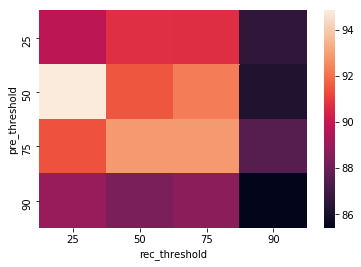

With instances sorted as True
With Early Stop set as False
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
2,True,False,rgb,25,75,92.198413,92.638889,94.097222,94.513889,89.135743,27.878806,89.169182,35.890131,0.277284,21.345838
4,True,False,rgb,50,25,91.982143,91.944444,94.097222,93.090278,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
12,True,False,rgb,90,25,91.488095,89.270833,97.152778,92.347222,89.135743,52.526524,89.169182,44.187739,0.277284,29.412202
14,True,False,rgb,90,75,91.402778,89.444444,96.527778,92.944444,89.135743,52.526524,89.169182,44.187739,0.277284,29.412202
10,True,False,rgb,75,75,91.198413,91.041667,94.097222,94.222222,89.135743,28.283814,89.169182,35.890131,0.277284,20.970718
6,True,False,rgb,50,75,91.132937,90.694444,93.680556,93.402778,89.135743,27.878806,89.169182,35.890131,0.277284,21.345838
13,True,False,rgb,90,50,91.012897,89.520833,95.902778,92.465278,89.135743,52.526524,89.169182,44.187739,0.277284,29.412202
8,True,False,rgb,75,25,90.521825,90.659722,93.402778,93.145833,89.135743,25.098813,89.169182,31.220071,0.277284,17.975640
0,True,False,rgb,25,25,89.830357,89.763889,92.916667,93.069444,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
5,True,False,rgb,50,50,89.823413,90.486111,92.638889,92.222222,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688


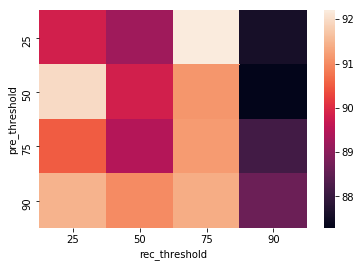

With instances sorted as False
With Early Stop set as True
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
4,False,True,rgb,50,25,92.688492,92.812500,95.625000,94.416667,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
0,False,True,rgb,25,25,92.422619,93.368056,94.097222,93.750000,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
8,False,True,rgb,75,25,92.160714,90.486111,96.527778,93.138889,88.989974,24.693806,89.140531,31.220071,0.693313,18.341688
1,False,True,rgb,25,50,91.942460,93.541667,92.638889,94.388889,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
6,False,True,rgb,50,75,91.591270,91.423611,94.791667,93.736111,88.980424,28.617510,89.140531,35.890131,0.690576,21.607804
5,False,True,rgb,50,50,91.093254,91.388889,94.027778,92.854167,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
9,False,True,rgb,75,50,90.075397,87.812500,95.763889,92.770833,89.135743,26.268437,89.169182,31.220071,0.277284,19.002630
10,False,True,rgb,75,75,89.746032,89.055556,93.888889,91.548611,88.846580,29.488985,89.140531,36.965285,0.936781,20.908566
2,False,True,rgb,25,75,88.635913,87.173611,93.958333,89.986111,86.814150,33.010890,89.140531,38.215728,8.395743,20.260705
3,False,True,rgb,25,90,87.104167,83.604167,97.638889,86.229167,86.984902,39.285361,89.111880,43.281012,7.208193,22.307789


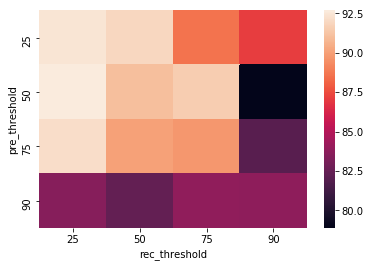

With instances sorted as False
With Early Stop set as False
rgb results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
5,False,False,rgb,50,50,92.244048,93.020833,94.375000,93.666667,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
0,False,False,rgb,25,25,92.000000,91.909722,94.652778,92.576389,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
1,False,False,rgb,25,50,91.277778,91.631944,93.888889,93.409722,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
10,False,False,rgb,75,75,90.968254,90.972222,94.444444,92.854167,89.133356,24.693806,89.169182,31.220071,0.275500,18.341688
6,False,False,rgb,50,75,90.964286,91.284722,94.097222,92.486111,89.130968,28.291903,89.140531,35.890131,0.276171,21.175856
4,False,False,rgb,50,25,90.801587,90.694444,93.958333,93.090278,89.135743,24.693806,89.169182,31.220071,0.277284,18.341688
2,False,False,rgb,25,75,90.480159,89.791667,94.652778,92.513889,89.104705,25.499081,89.140531,31.220071,0.264090,17.798463
3,False,False,rgb,25,90,90.144841,87.180556,97.430556,91.173611,85.294982,29.733994,89.140531,36.965285,17.790642,18.744549
8,False,False,rgb,75,25,90.136905,88.958333,93.958333,91.611111,89.135743,25.044485,89.169182,31.220071,0.277284,18.013014
9,False,False,rgb,75,50,89.505952,88.381944,95.208333,91.666667,89.135743,24.713346,89.169182,31.220071,0.277284,18.322837


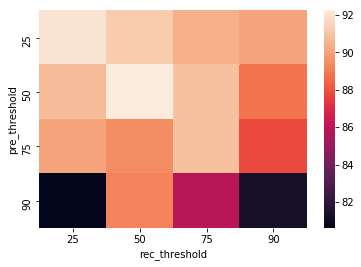

With instances sorted as True
With Early Stop set as True
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
1,True,True,shape,25,50,71.264286,81.541667,67.916667,78.208333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
13,True,True,shape,90,50,70.328571,81.291667,66.666667,80.958333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
14,True,True,shape,90,75,70.283333,79.416667,66.500000,80.866667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
5,True,True,shape,50,50,70.052381,81.083333,65.500000,78.541667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
11,True,True,shape,75,90,69.709524,79.333333,66.750000,81.016667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
15,True,True,shape,90,90,69.685714,77.041667,67.416667,79.900000,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
2,True,True,shape,25,75,69.545238,81.458333,64.916667,80.550000,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
6,True,True,shape,50,75,69.416667,80.666667,65.000000,80.875000,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
12,True,True,shape,90,25,69.390476,76.333333,67.000000,80.958333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
7,True,True,shape,50,90,68.325000,77.800000,65.250000,80.008333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652


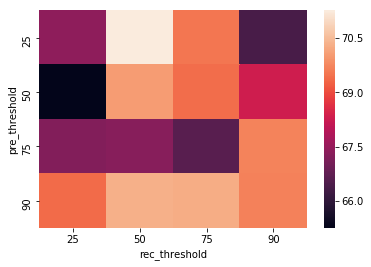

With instances sorted as True
With Early Stop set as False
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
1,True,False,shape,25,50,72.516667,83.666667,69.000000,82.558333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
13,True,False,shape,90,50,72.385714,85.250000,68.166667,79.016667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
4,True,False,shape,50,25,70.816667,80.083333,67.750000,80.616667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
14,True,False,shape,90,75,70.033333,80.750000,65.250000,80.116667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
15,True,False,shape,90,90,69.850000,80.166667,65.916667,81.833333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
10,True,False,shape,75,75,69.228571,77.875000,66.000000,80.175000,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
9,True,False,shape,75,50,68.716667,77.833333,66.000000,79.975000,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
3,True,False,shape,25,90,68.683333,77.250000,65.500000,79.116667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
0,True,False,shape,25,25,68.350000,78.625000,64.416667,76.058333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
7,True,False,shape,50,90,67.966667,79.583333,64.833333,79.366667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652


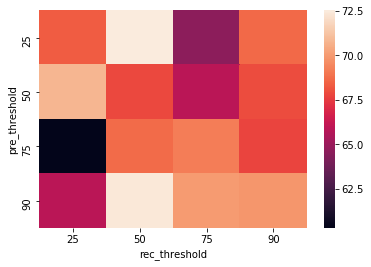

With instances sorted as False
With Early Stop set as True
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
7,False,True,shape,50,90,71.600000,81.416667,68.583333,82.941667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
14,False,True,shape,90,75,71.595238,83.458333,67.416667,80.641667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
15,False,True,shape,90,90,71.266667,79.416667,68.583333,82.116667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
4,False,True,shape,50,25,70.961905,81.291667,67.333333,81.766667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
12,False,True,shape,90,25,70.911905,80.375000,67.333333,80.675000,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
1,False,True,shape,25,50,70.011905,80.875000,65.833333,80.183333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
5,False,True,shape,50,50,69.902381,79.250000,66.750000,80.366667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
2,False,True,shape,25,75,69.283333,80.250000,64.916667,82.175000,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
11,False,True,shape,75,90,68.600000,80.083333,64.333333,78.316667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
0,False,True,shape,25,25,68.419048,79.000000,64.583333,80.866667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652


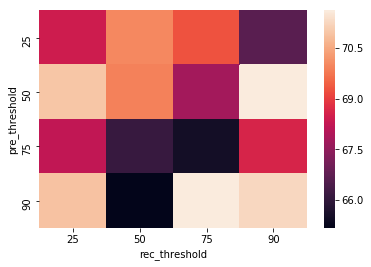

With instances sorted as False
With Early Stop set as False
shape results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
9,False,False,shape,75,50,72.083333,83.750000,67.750000,79.150000,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
14,False,False,shape,90,75,71.900000,83.250000,67.333333,82.166667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
8,False,False,shape,75,25,71.711905,81.458333,67.583333,82.991667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
5,False,False,shape,50,50,71.102381,80.250000,68.750000,81.741667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
12,False,False,shape,90,25,71.085714,79.875000,67.750000,82.475000,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
1,False,False,shape,25,50,70.366667,80.750000,66.000000,80.583333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
11,False,False,shape,75,90,69.866667,79.833333,66.083333,79.708333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
15,False,False,shape,90,90,69.607143,80.583333,65.333333,80.250000,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
10,False,False,shape,75,75,68.911905,78.958333,65.500000,79.691667,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652
0,False,False,shape,25,25,68.545238,81.291667,64.166667,78.558333,89.246538,31.366026,89.197833,33.488146,0.087419,10.724652


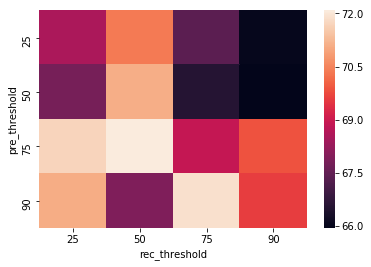

With instances sorted as True
With Early Stop set as True
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
0,True,True,object,25,25,74.553571,82.317708,72.213542,81.908854,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
13,True,True,object,90,50,73.718750,81.184896,71.458333,82.742188,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
7,True,True,object,50,90,73.063244,81.015625,70.390625,81.223958,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
14,True,True,object,90,75,73.017113,80.182292,71.276042,80.750000,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
2,True,True,object,25,75,73.011905,79.843750,71.015625,81.502604,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
10,True,True,object,75,75,72.842262,80.729167,70.104167,82.106771,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
1,True,True,object,25,50,72.830357,81.848958,69.270833,82.507812,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
12,True,True,object,90,25,72.780506,80.390625,70.937500,81.531250,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
5,True,True,object,50,50,72.372024,79.739583,69.843750,82.171875,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
6,True,True,object,50,75,72.249256,77.955729,71.848958,80.447917,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334


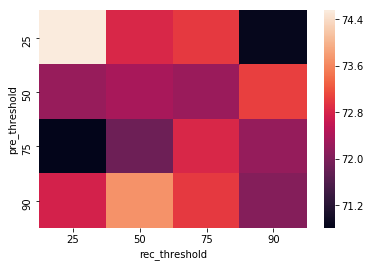

With instances sorted as True
With Early Stop set as False
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
5,True,False,object,50,50,74.496652,80.692708,73.177083,81.786458,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
9,True,False,object,75,50,73.630208,82.382812,70.755208,82.276042,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
4,True,False,object,50,25,73.528274,80.768229,71.822917,82.145833,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
8,True,False,object,75,25,73.162946,80.156250,71.536458,81.927083,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
10,True,False,object,75,75,72.998512,79.401042,71.041667,83.609375,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
15,True,False,object,90,90,72.882440,80.195312,70.833333,81.447917,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
6,True,False,object,50,75,72.528274,80.052083,70.442708,82.213542,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
7,True,False,object,50,90,72.319196,80.052083,69.895833,81.890625,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
1,True,False,object,25,50,72.261161,78.632812,71.197917,81.778646,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
13,True,False,object,90,50,72.132812,78.557292,70.651042,82.065104,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334


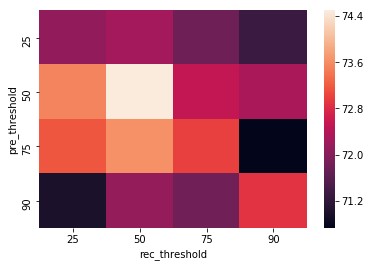

With instances sorted as False
With Early Stop set as True
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
6,False,True,object,50,75,74.055804,81.145833,72.213542,81.531250,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
2,False,True,object,25,75,73.464286,80.911458,71.302083,82.578125,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
14,False,True,object,90,75,73.380208,81.809896,70.807292,82.083333,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
11,False,True,object,75,90,72.831101,79.752604,71.223958,82.442708,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
0,False,True,object,25,25,72.673363,79.666667,70.833333,81.515625,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
12,False,True,object,90,25,72.649554,80.299479,70.234375,81.666667,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
1,False,True,object,25,50,72.578125,79.674479,70.598958,81.687500,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
4,False,True,object,50,25,72.516369,79.726562,70.494792,81.377604,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
7,False,True,object,50,90,72.208333,78.463542,70.859375,81.679688,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
5,False,True,object,50,50,72.125000,77.981771,71.041667,82.304688,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334


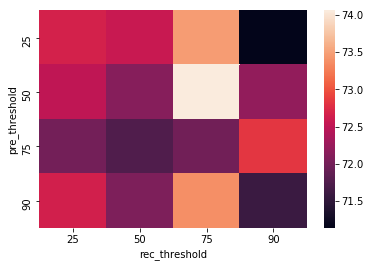

With instances sorted as False
With Early Stop set as False
object results:


,instances_sorted,early_stop,type,pre_threshold,rec_threshold,f1_score,precision,recall,accuracy,mean_max_dissim_,mean_min_dissim_,median_max_dissim_,median_min_dissim_,std_dev_max_dissim_,std_dev_min_dissim_
10,False,False,object,75,75,73.552827,80.364583,71.588542,83.007812,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
3,False,False,object,25,90,73.518601,81.341146,70.911458,83.372396,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
6,False,False,object,50,75,73.440476,79.648438,72.161458,81.588542,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
14,False,False,object,90,75,73.236607,80.390625,70.625000,81.750000,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
2,False,False,object,25,75,73.209077,79.882812,71.536458,81.705729,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
8,False,False,object,75,25,73.124256,81.380208,70.208333,81.674479,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
15,False,False,object,90,90,73.044643,80.768229,70.859375,81.710938,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
7,False,False,object,50,90,73.015625,79.830729,71.562500,81.937500,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
5,False,False,object,50,50,73.014881,79.739583,70.911458,82.143229,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334
11,False,False,object,75,90,72.851190,80.429688,71.432292,80.677083,89.225679,20.125674,89.312434,8.854126,0.242187,19.216334


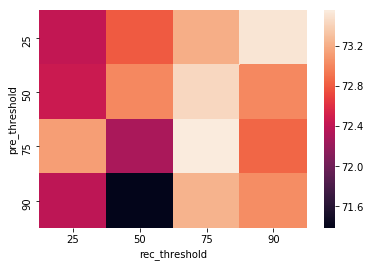

In [10]:
feature_types=["rgb","shape","object"]
early_stops=["True","False"]
instance_sorts=["True","False"]
All_Results=pd.DataFrame(Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().reset_index())
All_Results.to_csv("/Users/adithyabandi/Results.csv")
display()
for feature_type in feature_types:
    for instance_sort in instance_sorts:
        for early_stop in early_stops:
            print("With instances sorted as",instance_sort)
            print("With Early Stop set as",early_stop)
            print(feature_type,"results:")
            display_results(Results,feature_type,early_stop,instance_sort)